# Louvain

This notebook illustrates the clustering of a graph by the [Louvain algorithm](https://scikit-network.readthedocs.io/en/latest/reference/clustering.html#module-sknetwork.clustering).

In [35]:
import numpy as np
%matplotlib inline

import networkx as nx
import sknetwork as skn

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/types/containers.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


In [36]:
COLORS = ['r', 'g', 'b', 'c', 'm', 'y']

## Undirected graphs

**Loading**

In [37]:
adjacency = skn.data.karate_club()

<34x34 sparse matrix of type '<class 'numpy.int64'>'
	with 156 stored elements in Compressed Sparse Row format>

<34x34 sparse matrix of type '<class 'numpy.int64'>'
	with 156 stored elements in Compressed Sparse Row format>

**Clustering**

In [38]:
louvain = skn.clustering.Louvain(engine='python')
labels = louvain.fit_transform(adjacency)

Louvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='python'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, sorted_cluster=True, verbose=False)

Louvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='python'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, sorted_cluster=True, verbose=False)

In [40]:
unique_labels, counts = np.unique(labels, return_counts=True)
print(unique_labels, counts)

[0 1 2 3] [12 11  6  5]
[0 1 2 3] [12 11  6  5]


**Visualization**

In [41]:
graph = nx.from_scipy_sparse_matrix(adjacency)

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


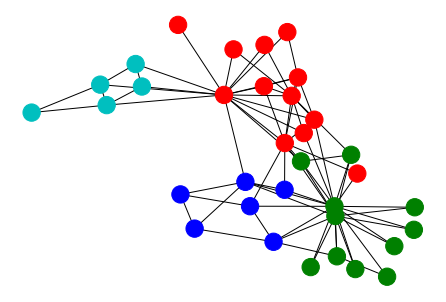

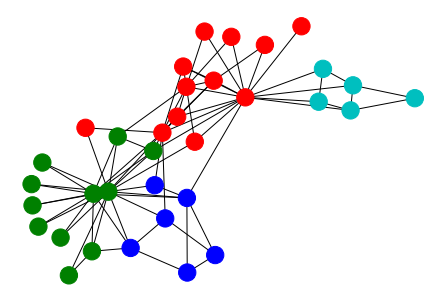

In [42]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, node_color=[COLORS[labels[i]] for i in graph])

**Metrics**

In [43]:
modularity = skn.clustering.modularity

In [44]:
modularity(adjacency, labels)

0.4188034188034188

0.4188034188034188

**Parameters**

In [45]:
# default engine = numba if available
louvain = skn.clustering.Louvain()
louvain.fit(adjacency)

Louvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='numba'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, sorted_cluster=True, verbose=False)

Louvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='numba'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, sorted_cluster=True, verbose=False)

In [46]:
# resolution parameter
louvain = skn.clustering.Louvain(resolution=2)
louvain.fit(adjacency)
labels = louvain.labels_
unique_labels, counts = np.unique(labels, return_counts=True)
print(unique_labels, counts)

[0 1 2 3 4 5 6] [7 7 6 6 4 2 2]
[0 1 2 3 4 5 6] [7 7 6 6 4 2 2]


## Directed graphs

**Loading**

In [47]:
adjacency, names = skn.data.painters(return_labels=True)

<14x14 sparse matrix of type '<class 'numpy.int64'>'
	with 50 stored elements in Compressed Sparse Row format>

<14x14 sparse matrix of type '<class 'numpy.int64'>'
	with 50 stored elements in Compressed Sparse Row format>

**Clustering**

In [48]:
louvain = skn.clustering.Louvain()
louvain.fit(adjacency)

Louvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='numba'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, sorted_cluster=True, verbose=False)

Louvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='numba'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, sorted_cluster=True, verbose=False)

In [49]:
labels = louvain.labels_
print(labels)

[1 0 2 0 2 2 1 0 1 2 1 0 0 1]
[1 0 2 0 2 2 1 0 1 2 1 0 0 1]


In [50]:
unique_labels, counts = np.unique(labels, return_counts=True)
print(unique_labels, counts)

[0 1 2] [5 5 4]
[0 1 2] [5 5 4]


**Visualization**

In [51]:
graph = nx.from_scipy_sparse_matrix(adjacency,create_using=nx.DiGraph())

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


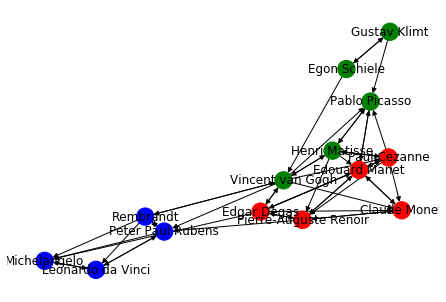

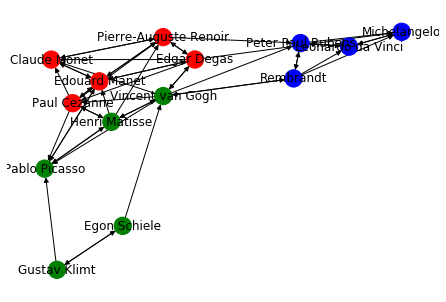

In [52]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, node_color=[COLORS[labels[i]] for i in graph], labels=names)

**Metrics**

In [53]:
modularity(adjacency, labels)

0.32480000000000003

0.32480000000000003

## Bipartite graphs

**Loading**

In [54]:
biadjacency, movies, actors = skn.data.movie_actor(return_labels=True)

<15x16 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

<15x16 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

**Clustering**

In [55]:
bilouvain = skn.clustering.BiLouvain()
bilouvain.fit(biadjacency)

BiLouvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='numba'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, sorted_cluster=True, verbose=False)

BiLouvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='numba'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, sorted_cluster=True, verbose=False)

In [56]:
row_labels = bilouvain.row_labels_
col_labels = bilouvain.col_labels_
labels = bilouvain.labels_
print(row_labels, col_labels)

[3 3 1 4 4 1 1 1 0 2 0 0 0 2 2] [2 3 3 1 1 0 4 1 1 0 0 2 2 0 2 0]
[3 3 1 4 4 1 1 1 0 2 0 0 0 2 2] [2 3 3 1 1 0 4 1 1 0 0 2 2 0 2 0]


In [57]:
unique_labels, row_counts = np.unique(row_labels, return_counts=True)
_, col_counts = np.unique(col_labels, return_counts=True)
print(unique_labels, row_counts, col_counts)

[0 1 2 3 4] [4 4 3 2 2] [5 4 4 2 1]
[0 1 2 3 4] [4 4 3 2 2] [5 4 4 2 1]


In [58]:
# Graph as undirected (ignoring the bipartite structure)
louvain = skn.clustering.Louvain()
adjacency = skn.utils.bipartite2undirected(biadjacency)
louvain.fit(adjacency)

Louvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='numba'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, sorted_cluster=True, verbose=False)

Louvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='numba'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, sorted_cluster=True, verbose=False)

In [59]:
n1, n2 = biadjacency.shape
row_labels_undirected = louvain.labels_[:n1]
col_labels_undirected = louvain.labels_[n1:]
labels_undirected = louvain.labels_
print(row_labels_undirected, col_labels_undirected)

[2 2 0 0 2 0 0 0 1 3 1 1 1 3 3] [2 2 2 0 0 0 2 0 0 1 1 3 3 1 3 1]
[2 2 0 0 2 0 0 0 1 3 1 1 1 3 3] [2 2 2 0 0 0 2 0 0 1 1 3 3 1 3 1]


In [60]:
unique_labels_undirected, row_counts_undirected = np.unique(row_labels_undirected, return_counts=True)
_, col_counts_undirected = np.unique(col_labels_undirected, return_counts=True)
print(unique_labels_undirected, row_counts_undirected, col_counts_undirected)

[0 1 2 3] [5 4 3 3] [5 4 4 3]
[0 1 2 3] [5 4 3 3] [5 4 4 3]


**Visualization**

In [61]:
graph = nx.from_scipy_sparse_matrix(adjacency)

In [62]:
pos = {i: (0, i) for i in range(n1)} 
pos.update({n1 + i: (2, i) for i in range(n2)})
pos_labels = {i: (0.5, i) for i in range(n1)} 
pos_labels.update({n1 + i: (1.5, i) for i in range(n2)})

In [63]:
names = movies
names.update({n1 + i: actors[i] for i in actors})

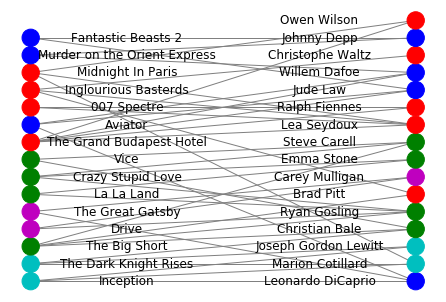

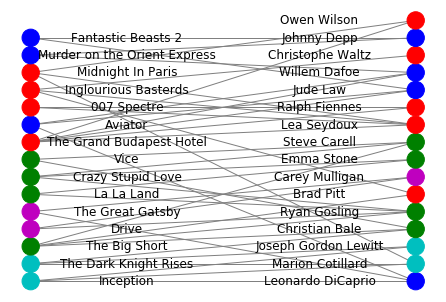

In [64]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=[COLORS[labels[i]] for i in graph], edge_color='grey')
_ = nx.draw_networkx_labels(graph, pos_labels, labels=names)

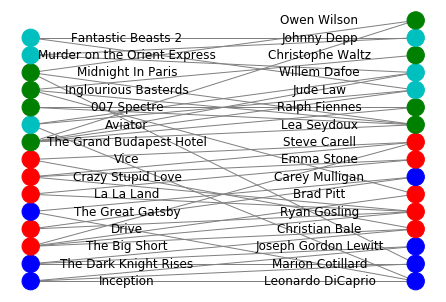

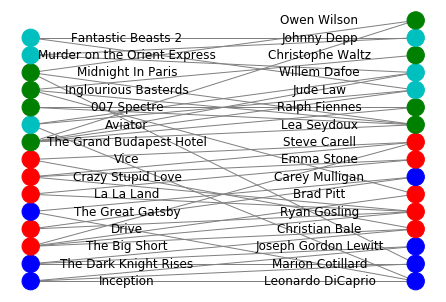

In [65]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=[COLORS[labels_undirected[i]] for i in graph], edge_color='grey')
_ = nx.draw_networkx_labels(graph, pos_labels, labels=names)

**Metrics**

In [66]:
biadjacency

<15x16 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

<15x16 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

In [67]:
skn.clustering.bimodularity(biadjacency, row_labels, col_labels)

0.5728732897085069

0.5728732897085069

In [68]:
skn.clustering.bimodularity(biadjacency, row_labels_undirected, col_labels_undirected)

0.5704937537180249

0.5704937537180249